In [7]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 432.0 kB/s eta 0:00:0000:0100:01


In [ ]:
# sergeeva ai

In [1]:
# Генерация данных на миллион строк

# Загрузка файла с данными об акциях за 2020 год

import pandas as pd
import numpy as np
from datetime import timedelta, datetime

original_df=pd.read_excel('surgutneftgaz.xlsx')

In [2]:
# Посмотрим первые 5 строк

original_df.head()

,Дата торгов,Код инструмента,"Сделок,шт.",Объем,Срвзв.цена,Первая,Минимум,Максимум,Закрытия
0,2020-12-30,SNGS,11128,1.169991e+09,35.990,35.82,35.600,36.330,36.130
1,2020-12-29,SNGS,10558,1.154004e+09,35.720,35.45,35.210,36.040,35.860
2,2020-12-28,SNGS,7766,7.134674e+08,35.365,35.05,35.050,35.535,35.430
3,2020-12-25,SNGS,3524,2.286850e+08,35.020,35.00,34.910,35.100,35.100
4,2020-12-24,SNGS,5255,4.209575e+08,34.925,34.91,34.785,35.075,35.035


In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Дата торгов      250 non-null    datetime64[ns]
 1   Код инструмента  250 non-null    object        
 2   Сделок,шт.       250 non-null    int64         
 3   Объем            250 non-null    float64       
 4   Срвзв.цена       250 non-null    float64       
 5   Первая           250 non-null    float64       
 6   Минимум          250 non-null    float64       
 7   Максимум         250 non-null    float64       
 8   Закрытия         250 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 17.7+ KB


In [5]:
new_data['Дата торгов'] = pd.PeriodIndex(new_data['Дата торгов'], freq='D')
original_df['Дата торгов'] = pd.PeriodIndex(original_df['Дата торгов'], freq='D')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype    
---  ------           --------------    -----    
 0   Дата торгов      1000000 non-null  period[D]
 1   Код инструмента  1000000 non-null  object   
 2   Сделок,шт.       1000000 non-null  int64    
 3   Объем            1000000 non-null  float64  
 4   Срвзв.цена       1000000 non-null  float64  
 5   Первая           1000000 non-null  float64  
 6   Минимум          1000000 non-null  float64  
 7   Максимум         1000000 non-null  float64  
 8   Закрытия         1000000 non-null  float64  
dtypes: float64(6), int64(1), object(1), period[D](1)
memory usage: 68.7+ MB


In [12]:
original_df['Дата торгов'] = original_df['Дата торгов'].astype('object')

In [2]:
# Находим дубликаты

duplicate=original_df[original_df.duplicated(subset=['Дата торгов'], keep='first')]

original_df=original_df.drop_duplicates().reset_index(drop=True)

original_df.duplicated().sum()

0

In [20]:
original_df.describe()

,Дата торгов,"Сделок,шт.",Объем,Срвзв.цена,Первая,Минимум,Максимум,Закрытия
count,210,210.000000,2.100000e+02,210.000000,210.000000,210.000000,210.000000,210.000000
mean,2020-07-08 04:06:51.428571392,20262.995238,2.198983e+09,38.418881,38.486333,37.752738,39.084643,38.374786
min,2020-01-03 00:00:00,3524.000000,2.286850e+08,25.215000,25.000000,24.185000,26.250000,24.835000
25%,2020-03-20 18:00:00,11273.000000,1.078636e+09,35.117500,35.155000,34.690000,35.523750,35.062500
50%,2020-07-07 12:00:00,15901.500000,1.562086e+09,36.935000,37.132500,36.502500,37.472500,36.940000
75%,2020-10-15 18:00:00,24955.750000,2.922554e+09,39.991250,40.118750,39.297500,40.753750,39.976250
max,2020-12-30 00:00:00,95248.000000,1.026941e+10,54.305000,54.000000,53.805000,54.890000,54.170000
std,NaN,13239.371592,1.658026e+09,5.851950,5.892647,5.852178,5.904971,5.856307


In [3]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime

# Генерация миллиона записей
start_date = datetime(2021, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(1000000)]

new_data = pd.DataFrame({
    'Дата торгов': dates,
    'Код инструмента': ['SNGS']*1000000,
    'Сделок,шт.': np.random.randint(1, 10000, size=1000000),
    'Объем': np.random.uniform(1e6, 1e9, size=1000000),
    'Срвзв.цена': np.random.uniform(30, 40, size=1000000),
    'Первая': np.random.uniform(30, 40, size=1000000),
    'Минимум': np.random.uniform(30, 40, size=1000000),
    'Максимум': np.random.uniform(30, 40, size=1000000),
    'Закрытия': np.random.uniform(30, 40, size=1000000)
})


new_data.head()

,Дата торгов,Код инструмента,"Сделок,шт.",Объем,Срвзв.цена,Первая,Минимум,Максимум,Закрытия
0,2021-01-01 00:00:00,SNGS,6872,7.120833e+08,31.565672,39.259107,34.836471,33.413468,31.468268
1,2021-01-02 00:00:00,SNGS,917,3.087186e+08,35.095378,31.857907,36.641891,38.498883,37.484676
2,2021-01-03 00:00:00,SNGS,8959,3.720731e+08,33.164000,31.300134,31.735242,30.822178,39.424939
3,2021-01-04 00:00:00,SNGS,7076,9.213037e+08,32.353085,37.598319,38.213888,34.420414,31.040336
4,2021-01-05 00:00:00,SNGS,6282,4.588623e+08,39.834238,38.733749,38.844744,31.069639,35.301066


In [10]:
new_data.head()

,Дата торгов,Код инструмента,"Сделок,шт.",Объем,Срвзв.цена,Первая,Минимум,Максимум,Закрытия
0,2021-01-01,SNGS,8696,4.569340e+08,34.061216,36.389626,37.163480,31.877990,38.825912
1,2021-01-02,SNGS,6037,5.070535e+08,30.858230,30.358671,36.209820,35.979838,34.678109
2,2021-01-03,SNGS,8016,1.103974e+08,30.199128,32.163772,38.345884,33.041401,32.278157
3,2021-01-04,SNGS,3665,8.406004e+08,37.150677,30.591517,33.548290,34.406470,35.990678
4,2021-01-05,SNGS,1773,3.842005e+08,33.943313,30.054578,37.514799,35.730792,35.933381


In [6]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Дата торгов      1000000 non-null  object 
 1   Код инструмента  1000000 non-null  object 
 2   Сделок,шт.       1000000 non-null  int64  
 3   Объем            1000000 non-null  float64
 4   Срвзв.цена       1000000 non-null  float64
 5   Первая           1000000 non-null  float64
 6   Минимум          1000000 non-null  float64
 7   Максимум         1000000 non-null  float64
 8   Закрытия         1000000 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 68.7+ MB


In [4]:
df= pd.concat([new_data, original_df])
df

,Дата торгов,Код инструмента,"Сделок,шт.",Объем,Срвзв.цена,Первая,Минимум,Максимум,Закрытия
0,2021-01-01 00:00:00,SNGS,6872,7.120833e+08,31.565672,39.259107,34.836471,33.413468,31.468268
1,2021-01-02 00:00:00,SNGS,917,3.087186e+08,35.095378,31.857907,36.641891,38.498883,37.484676
2,2021-01-03 00:00:00,SNGS,8959,3.720731e+08,33.164000,31.300134,31.735242,30.822178,39.424939
3,2021-01-04 00:00:00,SNGS,7076,9.213037e+08,32.353085,37.598319,38.213888,34.420414,31.040336
4,2021-01-05 00:00:00,SNGS,6282,4.588623e+08,39.834238,38.733749,38.844744,31.069639,35.301066
...,...,...,...,...,...,...,...,...,...
205,2020-01-10 00:00:00,SNGS,21963,3.030867e+09,54.075000,53.745000,53.330000,54.650000,54.000000
206,2020-01-09 00:00:00,SNGS,20382,2.751027e+09,52.930000,52.150000,51.665000,53.800000,53.645000
207,2020-01-08 00:00:00,SNGS,15871,2.072128e+09,52.405000,52.200000,51.835000,52.990000,52.000000
208,2020-01-06 00:00:00,SNGS,16193,2.112802e+09,51.875000,51.015000,51.015000,52.420000,52.200000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Дата торгов      1000210 non-null  object 
 1   Код инструмента  1000210 non-null  object 
 2   Сделок,шт.       1000210 non-null  int64  
 3   Объем            1000210 non-null  float64
 4   Срвзв.цена       1000210 non-null  float64
 5   Первая           1000210 non-null  float64
 6   Минимум          1000210 non-null  float64
 7   Максимум         1000210 non-null  float64
 8   Закрытия         1000210 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 76.3+ MB


In [6]:
print(df.shape)

(1000210, 9)


In [5]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import col, to_timestamp

# Создание SparkSession
spark = SparkSession.builder \
    .appName("SNGSHadoop") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

# Установка количества разделов для shuffle операций
spark.conf.set("spark.sql.shuffle.partitions", "50")

# Определение схемы 
schema = StructType([
    StructField("Дата торгов", StringType(), True),  # Храним как строку
    StructField("Код инструмента", StringType(), True),
    StructField("Сделок,шт.", IntegerType(), True),
    StructField("Объем", FloatType(), True),
    StructField("Срвзв.цена", FloatType(), True),
    StructField("Первая", FloatType(), True),
    StructField("Минимум", FloatType(), True),
    StructField("Максимум", FloatType(), True),
    StructField("Закрытия", FloatType(), True),
])


df['Дата торгов'] = df['Дата торгов'].astype(str) 

# Преобразуйте DataFrame в Spark DataFrame
spark_df = spark.createDataFrame(df, schema)

# Сохранение DataFrame в формате CSV в HDFS
file_path_hdfs = "hdfs://localhost:9000/user4/hadoop/economic_data/SNGS.csv"
spark_df.write.mode("overwrite").option("header", True).csv(file_path_hdfs)

# Загрузить DataFrame из HDFS
df_from_hdfs = spark.read.csv(file_path_hdfs, header=True, schema=schema)

df_from_hdfs = df_from_hdfs.withColumn("Дата торгов", to_timestamp(col("Дата торгов"), 'yyyy-MM-dd HH:mm:ss'))

# Вывод DataFrame
df_from_hdfs.show()

24/11/10 01:56:33 WARN Utils: Your hostname, devopsvm resolves to a loopback address: 127.0.1.1; using 192.168.65.141 instead (on interface enp0s3)
24/11/10 01:56:33 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/10 01:56:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/11/10 01:58:52 WARN TaskSetManager: Stage 0 contains a task of very large size (41008 KiB). The maximum recommended task size is 1000 KiB.


+-------------------+---------------+----------+------------+----------+---------+---------+---------+---------+
|        Дата торгов|Код инструмента|Сделок,шт.|       Объем|Срвзв.цена|   Первая|  Минимум| Максимум| Закрытия|
+-------------------+---------------+----------+------------+----------+---------+---------+---------+---------+
|3389-03-02 00:00:00|           SNGS|      2666| 7.9419629E8|  39.98809| 36.35474| 38.69878|38.003986| 36.82188|
|3389-03-03 00:00:00|           SNGS|      2284| 8.9478483E8| 33.086674| 35.24966|34.677734|36.766525| 39.88982|
|3389-03-04 00:00:00|           SNGS|      4065| 7.0058925E8| 31.013971|31.181227|39.475574|39.861958|32.364895|
|3389-03-05 00:00:00|           SNGS|      5194| 9.1120218E8| 30.639389|37.473392|30.663572|32.086414|36.073643|
|3389-03-06 00:00:00|           SNGS|      6863| 6.6447408E7| 32.138943|36.957325|31.628038|36.701347|33.998077|
|3389-03-07 00:00:00|           SNGS|      2749|   5.67403E7| 39.033356|30.959951|32.792976|33.9

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 53098)
Traceback (most recent call last):
  File "/home/devops/.config/jupyterlab-desktop/jlab_server/lib/python3.12/socketserver.py", line 318, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/devops/.config/jupyterlab-desktop/jlab_server/lib/python3.12/socketserver.py", line 349, in process_request
    self.finish_request(request, client_address)
  File "/home/devops/.config/jupyterlab-desktop/jlab_server/lib/python3.12/socketserver.py", line 362, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/devops/.config/jupyterlab-desktop/jlab_server/lib/python3.12/socketserver.py", line 761, in __init__
    self.handle()
  File "/home/devops/.config/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/pyspark/accumulators.py", line 295, in handle
    poll(accum_updates)
  File "/home/devops/.conf

In [2]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import col, to_timestamp

# Создание SparkSession
spark = SparkSession.builder \
    .appName("SNGSHadoopp") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

# Установка количества разделов для shuffle операций
spark.conf.set("spark.sql.shuffle.partitions", "50")

file_path_hdfs = "hdfs://localhost:9000/user4/hadoop/economic_data/SNGS.csv"

schema = StructType([
    StructField("Дата торгов", StringType(), True),  # Храним как строку
    StructField("Код инструмента", StringType(), True),
    StructField("Сделок,шт.", IntegerType(), True),
    StructField("Объем", FloatType(), True),
    StructField("Срвзв.цена", FloatType(), True),
    StructField("Первая", FloatType(), True),
    StructField("Минимум", FloatType(), True),
    StructField("Максимум", FloatType(), True),
    StructField("Закрытия", FloatType(), True),
])rfr


# Загрузка DataFrame из HDFS
df_from_hdfs = spark.read.csv(file_path_hdfs, header=True, schema=schema)

df_from_hdfs = df_from_hdfs.withColumn("Дата торгов", to_timestamp(col("Дата торгов"), 'yyyy-MM-dd HH:mm:ss'))

# Вывод DataFrame
df_from_hdfs.show()

+-------------------+---------------+----------+------------+----------+---------+---------+---------+---------+
|        Дата торгов|Код инструмента|Сделок,шт.|       Объем|Срвзв.цена|   Первая|  Минимум| Максимум| Закрытия|
+-------------------+---------------+----------+------------+----------+---------+---------+---------+---------+
|3389-03-02 00:00:00|           SNGS|      2666| 7.9419629E8|  39.98809| 36.35474| 38.69878|38.003986| 36.82188|
|3389-03-03 00:00:00|           SNGS|      2284| 8.9478483E8| 33.086674| 35.24966|34.677734|36.766525| 39.88982|
|3389-03-04 00:00:00|           SNGS|      4065| 7.0058925E8| 31.013971|31.181227|39.475574|39.861958|32.364895|
|3389-03-05 00:00:00|           SNGS|      5194| 9.1120218E8| 30.639389|37.473392|30.663572|32.086414|36.073643|
|3389-03-06 00:00:00|           SNGS|      6863| 6.6447408E7| 32.138943|36.957325|31.628038|36.701347|33.998077|
|3389-03-07 00:00:00|           SNGS|      2749|   5.67403E7| 39.033356|30.959951|32.792976|33.9

In [3]:
from pyspark.sql.functions import col

# Фильтрация данных в PySpark перед преобразованием
df_filtered = df_from_hdfs.filter(col("Дата торгов") < "2021-01-01")

pandas_df1 = df_filtered.toPandas()

pandas_df1.head()

,Дата торгов,Код инструмента,"Сделок,шт.",Объем,Срвзв.цена,Первая,Минимум,Максимум,Закрытия
0,2020-12-30,SNGS,11128,1.169991e+09,35.990002,35.820000,35.599998,36.330002,36.130001
1,2020-12-29,SNGS,10558,1.154004e+09,35.720001,35.450001,35.209999,36.040001,35.860001
2,2020-12-28,SNGS,7766,7.134674e+08,35.365002,35.049999,35.049999,35.535000,35.430000
3,2020-12-25,SNGS,3524,2.286850e+08,35.020000,35.000000,34.910000,35.099998,35.099998
4,2020-12-24,SNGS,5255,4.209575e+08,34.924999,34.910000,34.785000,35.075001,35.035000


In [4]:
pandas_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Дата торгов      210 non-null    datetime64[ns]
 1   Код инструмента  210 non-null    object        
 2   Сделок,шт.       210 non-null    int32         
 3   Объем            210 non-null    float32       
 4   Срвзв.цена       210 non-null    float32       
 5   Первая           210 non-null    float32       
 6   Минимум          210 non-null    float32       
 7   Максимум         210 non-null    float32       
 8   Закрытия         210 non-null    float32       
dtypes: datetime64[ns](1), float32(6), int32(1), object(1)
memory usage: 9.2+ KB


In [6]:
pandas_df1.describe()

,Дата торгов,"Сделок,шт.",Объем,Срвзв.цена,Первая,Минимум,Максимум,Закрытия
count,210,210.000000,2.100000e+02,210.000000,210.000000,210.000000,210.000000,210.000000
mean,2020-07-08 04:06:51.428571392,20262.995238,2.198983e+09,38.418884,38.486336,37.752739,39.084641,38.374786
min,2020-01-03 00:00:00,3524.000000,2.286850e+08,25.215000,25.000000,24.184999,26.250000,24.834999
25%,2020-03-20 18:00:00,11273.000000,1.078636e+09,35.117500,35.155001,34.690001,35.523750,35.062499
50%,2020-07-07 12:00:00,15901.500000,1.562086e+09,36.935001,37.132500,36.502501,37.472500,36.940001
75%,2020-10-15 18:00:00,24955.750000,2.922554e+09,39.991251,40.118750,39.297501,40.753751,39.976250
max,2020-12-30 00:00:00,95248.000000,1.026941e+10,54.305000,54.000000,53.805000,54.889999,54.169998
std,NaN,13239.371592,1.658026e+09,5.851950,5.892647,5.852178,5.904970,5.856308


In [8]:
!pip install altair

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.1/658.1 kB 942.1 kB/s eta 0:00:000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 529.8 kB/s eta 0:00:00 0:00:01


In [9]:
import altair as alt

# Строим график изменения цены закрытия
alt.Chart(pandas_df1).mark_line().encode(
    x='Дата торгов',
    y='Закрытия',
    tooltip='Закрытия',
).properties(title='Динамика цены закрытия акций за год').interactive()

alt.Chart(...)

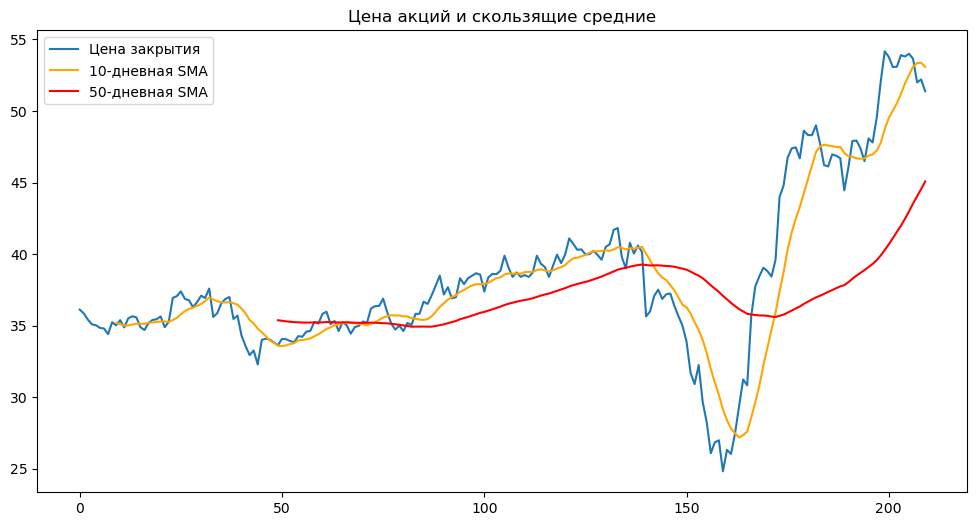

In [12]:
import matplotlib.pyplot as plt

pandas_df2 = pandas_df1
pandas_df2['SMA_10'] = pandas_df2['Закрытия'].rolling(window=10).mean()
pandas_df2['SMA_50'] = pandas_df2['Закрытия'].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(pandas_df2['Закрытия'], label='Цена закрытия')
plt.plot(pandas_df2['SMA_10'], label='10-дневная SMA', color='orange')
plt.plot(pandas_df2['SMA_50'], label='50-дневная SMA', color='red')
plt.title('Цена акций и скользящие средние')
plt.legend()
plt.show()

In [13]:
import altair as alt


alt.Chart(pandas_df1).mark_line().encode(
    x='Дата торгов',
    y='Объем',
    tooltip='Объем',
).properties(title='Объем сделок за год').interactive()

alt.Chart(...)

In [14]:
alt.Chart(pandas_df1).mark_point().encode(
    x='Объем',
    y='Закрытия',
    opacity=alt.value(0.5)
).properties(title='Диаграмма рассеяния объема сделок и цены закрытия').interactive()

alt.Chart(...)

In [29]:
pandas_df2['Volatility'] = pandas_df2['Максимум'] - pandas_df2['Минимум']

alt.Chart(pandas_df2).mark_line().encode(
    x='Дата торгов',
    y='Volatility',
    tooltip='Volatility'
).properties(title='Волатильность за год').interactive()

alt.Chart(...)

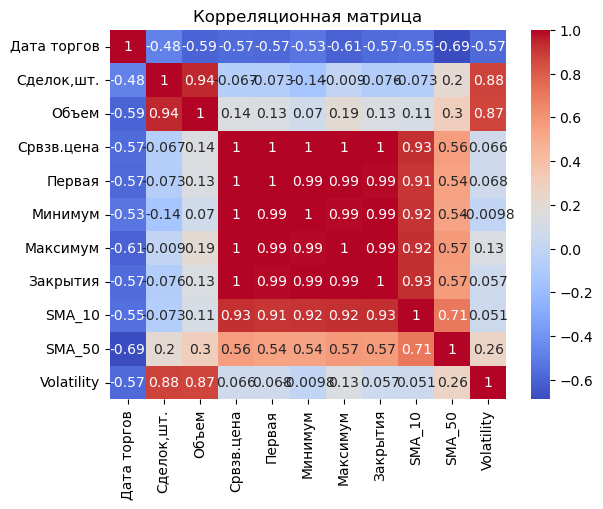

In [34]:
pandas_df3 = pandas_df1
pandas_df3 =pandas_df3.drop(['Код инструмента'], axis=1)

corel_matr = pandas_df3.corr()

import seaborn as sns

sns.heatmap(corel_matr, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [35]:
opening_std = pandas_df1['Первая'].std()

opening_std

5.8926473